In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *
from nba_api.stats.endpoints import leaguedashteamstats

img_DIR_T = "../data/images/teams/"
fig_DIR = "../figs/teams/"
box_DIR = "../data/box/"

In [2]:
season = 2023
stats = leaguegamelog.LeagueGameLog(player_or_team_abbreviation="T",season=season,season_type_all_star="Regular Season",)
df1 = stats.get_data_frames()[0]
season = 2024
stats = leaguegamelog.LeagueGameLog(player_or_team_abbreviation="T",season=season,season_type_all_star="Regular Season",)
df2 = stats.get_data_frames()[0]

In [3]:
df1["GAME_DATE"] = pd.to_datetime(df1["GAME_DATE"])
df2["GAME_DATE"] = pd.to_datetime(df2["GAME_DATE"])
df1["Win"] = np.where(df1["WL"] == "W", 1,0)
df2["Win"] = np.where(df2["WL"] == "W", 1,0)

In [4]:
ty = datetime.today()
ly = ty - dt.timedelta(days=366)
df3 = df1.query(f"GAME_DATE <'{ly}'").reset_index(drop=True)

In [16]:
df4 = df3.groupby(["TEAM_ID","TEAM_NAME"])[["Win"]].sum()
df4 = df4.reset_index()
df5 = df2.groupby(["TEAM_ID","TEAM_NAME"])[["Win"]].sum()
df5 = df5.reset_index()

In [17]:
df6 = pd.merge(df4,df5,on=["TEAM_ID","TEAM_NAME"],suffixes=["s",""])
df6["image"] = img_DIR_T + df6["TEAM_NAME"] + ".png"
df6 = df6.sort_values("Win").reset_index(drop=True)
teams = df6["TEAM_NAME"].to_list()
df6["Team"] = pd.Categorical(df6["TEAM_NAME"],categories=teams,ordered=True)

In [7]:
from plotnine import arrow

In [18]:
arrowstyle="wedge,shrink_factor=0.4,tail_width=0.6"

 plt.annotate(xy=(starting_x, starting_y), xytext=(ending_x, ending_y), text="", size=6, alpha=0.9, zorder=2,
                 arrowprops=dict(arrowstyle="wedge,shrink_factor=0.4,tail_width=0.6", ec=team_style['outer_color'],
                                 fc=team_style['inner_color']))

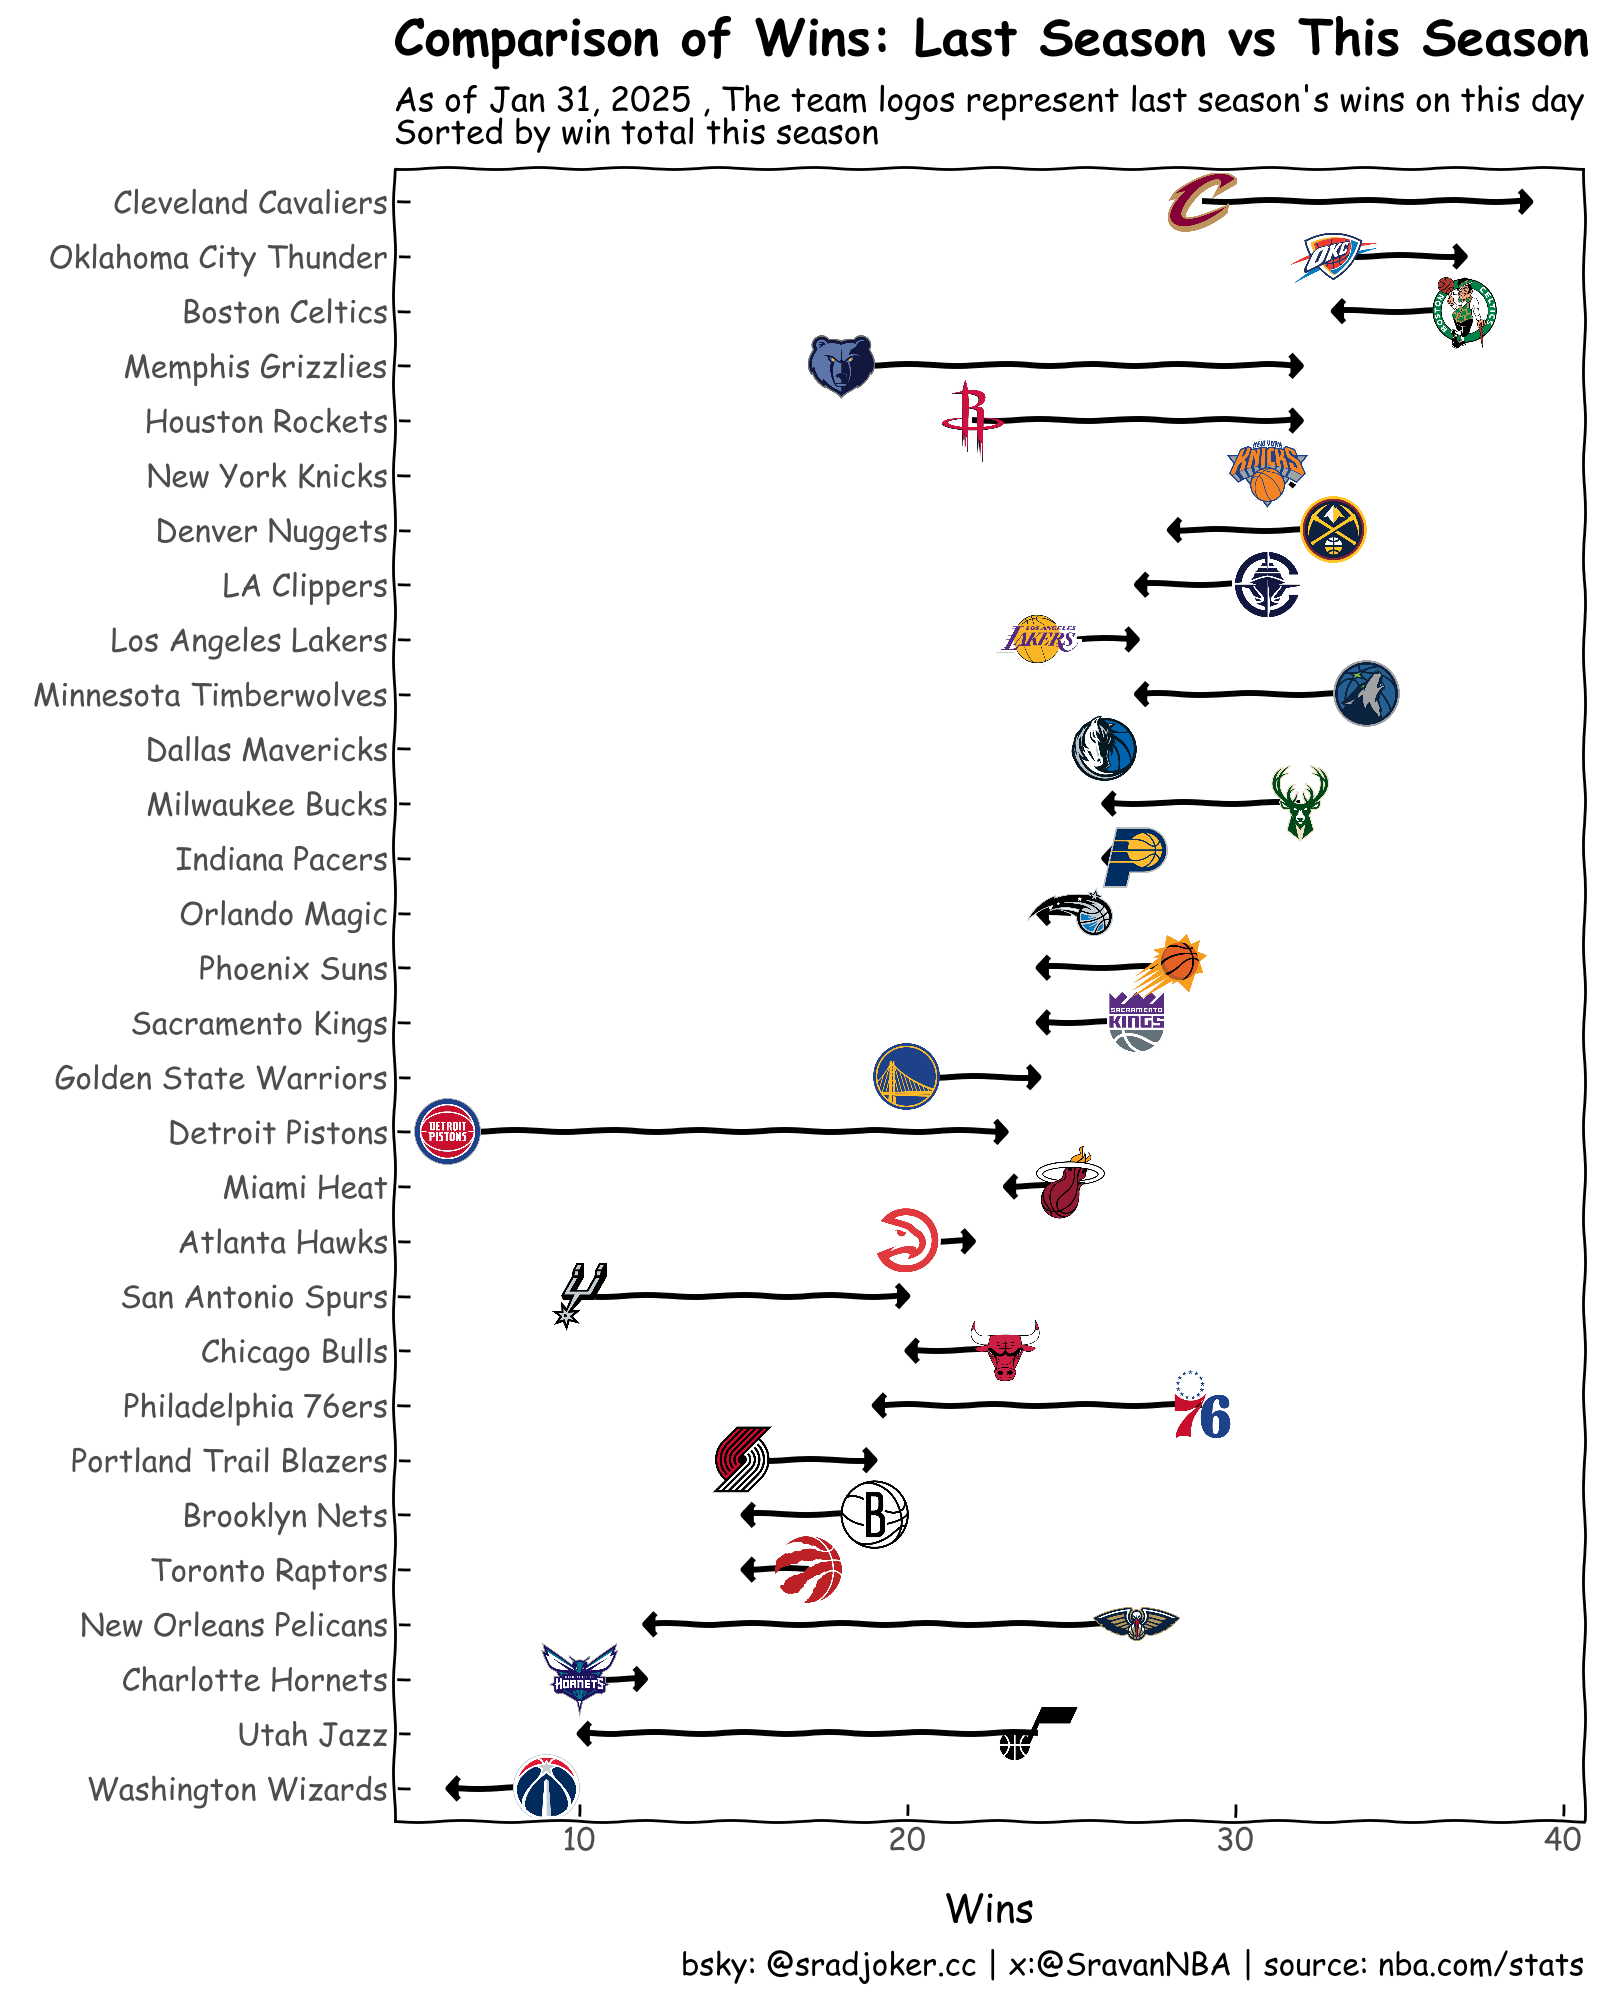

In [19]:
data = df6.copy()
p = (
    ggplot(data)
    + aes(x="Wins",xend="Win",y="Team",yend="Team",image = "image")
    + geom_segment(size=1.2,arrow=arrow(ends="last",type="closed",length=0.05))
    # + geom_segment(size=1.2)
    # + geom_point()
    + geom_image(aes(x="Wins"),size=0.08)
    + theme_idv
    + theme_xkcd(base_size=14)
    + theme(
        figure_size=(8,10),
        axis_title_y=element_blank(),
        axis_title_x=element_text(size=14),
        plot_subtitle=element_text(size=12),
        plot_title=element_text(size=18,weight="bold"),
        text=element_text(family=["Comic Sans MS"])
    )
    + labs(
        title="Comparison of Wins: Last Season vs This Season",
        subtitle="As of " + ty.strftime("%b %d, %Y") + " , The team logos represent last season's wins on this day\nSorted by win total this season",
        caption="bsky: @sradjoker.cc | x:@SravanNBA | source: nba.com/stats"
    )
)
p

In [10]:
df6 = pd.merge(df4,df5,on=["TEAM_ID","TEAM_NAME"],suffixes=["s",""])
df6["Diff"] = df6["Win"] - df6["Wins"]
df6["image"] = img_DIR_T + df6["TEAM_NAME"] + ".png"
df6 = df6.sort_values("Diff").reset_index(drop=True)
teams = df6["TEAM_NAME"].to_list()
df6["Team"] = pd.Categorical(df6["TEAM_NAME"],categories=teams,ordered=True)

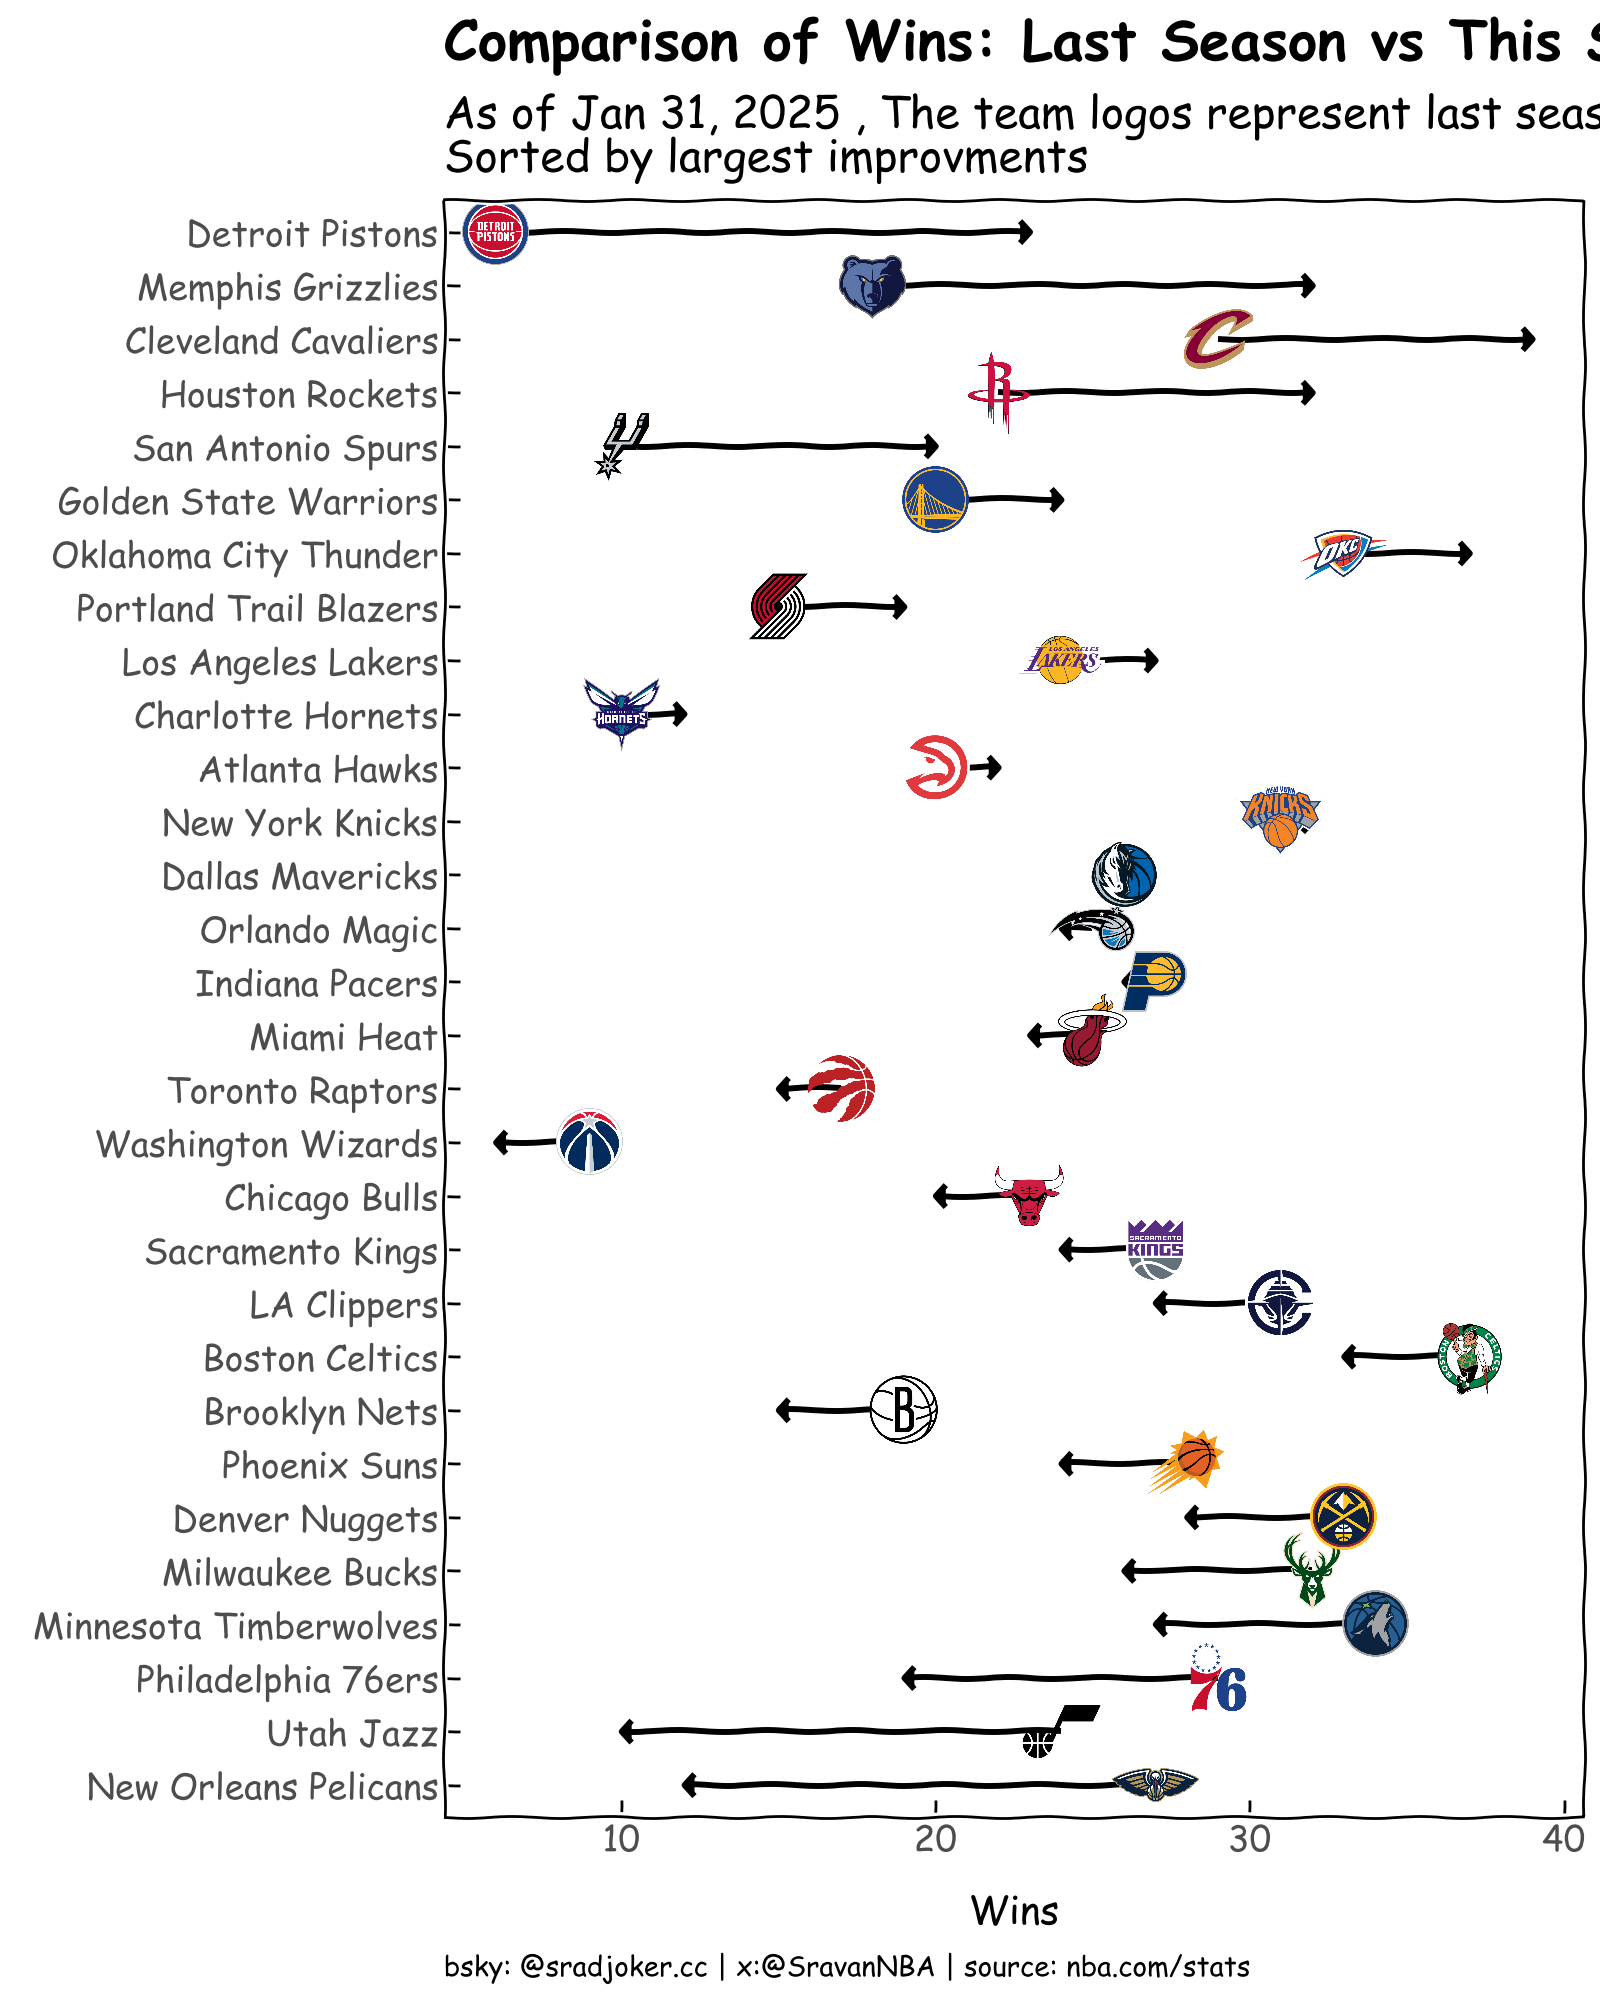

In [11]:
data = df6.copy()
p = (
    ggplot(data)
    + aes(x="Wins",xend="Win",y="Team",yend="Team",image = "image")
    + geom_segment(size=1.2,arrow=arrow(ends="last",type="closed",length=0.05))
    # + geom_segment(size=1.2)
    # + geom_point()
    + geom_image(aes(x="Wins"),size=0.08)
    + theme_idv
    + theme(
        figure_size=(8,10),
        axis_title_y=element_blank(),
        axis_title_x=element_text(size=14)
    )
    + labs(
        title="Comparison of Wins: Last Season vs This Season",
        subtitle="As of " + ty.strftime("%b %d, %Y") + " , The team logos represent last season's wins on this day\nSorted by largest improvments",
        caption="bsky: @sradjoker.cc | x:@SravanNBA | source: nba.com/stats"
    )
)
p